# Text Analysis
#### Exploring the following methods:
- [Basic Text Analysis](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week06-mcnulty3/05-nlp/NLP_nltk.ipynb) (Sentence and word tokenization, part of speech tagging, chunking)
- Dimension Reduction (PCA)
    - [PCA Lecture](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/02-dim_reduct_pca/Dimensionality_Reduction_PCA.pdf)
    - [PCA / SVD Code](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/02-dim_reduct_pca/pca_SVD.ipynb)
    - [LDA / LSA / NMF](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/02-dim_reduct_pca/LSA_NMF.ipynb)
    - [Recommender Systems](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/02-dim_reduct_pca/Recommender_Systems.ipynb)
- Topic Modeling (UMF, LDA)
    - [Lecture](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/03-lda_topics_models/Topic_Modeling.pdf)
    - [LDA Code](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/03-lda_topics_models/LDA.ipynb)
- [Word2Vec (Gensim)](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/04-word2vec/WORD2VEC_GENSIM.ipynb)
- Clustering (K-Means)
    - [Lecture](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/01-unsup_kmeans/Unsupervised_Learning_Kmeans.pdf)
    - [Code](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week07-fletcher1/01-unsup_kmeans/digits_clustering.ipynb)
- Text Summarization
    - [Sumy (Extractive Text Summarization)](https://pypi.python.org/pypi/sumy)
    - [Keras *Maybe* (Abstractive Text Summarization)](https://hackernoon.com/how-to-run-text-summarization-with-tensorflow-d4472587602d)
    - [Google Research](https://research.googleblog.com/2016/08/text-summarization-with-tensorflow.html)
- Visualization
    - Overall article topic distribution by blog
    - ...

---

## Using Fletcher Library Functions

In [1]:
from FletcherLibrary import MongoQuery as MQ
from FletcherLibrary import TextAnalysis as TA
from FletcherLibrary import TopicModel as TM
from gensim import corpora, models, similarities, matutils

In [2]:
collection = MQ.GetMongoCollection('blog_data', 'reuters_all')

In [3]:
MQ.GetFields(collection)

{'_id', 'author', 'content', 'date', 'title', 'url'}

In [4]:
df = MQ.FetchData(collection, ['author', 'title', 'date', 'content'])
# df = MQ.FetchData(collection, ['author', 'title', 'date', 'content', 'post_categories'])
# df['post_categories'] = df['post_categories'].apply(lambda x: '' if len(x)==0 else x[0])
df.head()

,author,title,date,content
0,Reuters Editorial,Konta overcomes blip to get past Keys in Brisb...,2018-01-01 12:37:56,(Reuters) - Johanna Konta made a shaky start t...
1,Reuters Editorial,Zverev cruises into second round at Brisbane,2018-01-01 12:56:09,(Reuters) - Mischa Zverev powered past Austral...
2,Donny Kwok and Wyman Ma,"After tough year, Hong Kong democracy proteste...",2018-01-01 13:20:45,HONG KONG (Reuters) - After a year that saw de...
3,Reuters Editorial,India's infrastructure output grows 6.8 percen...,2018-01-01 12:14:32,NEW DELHI (Reuters) - India’s annual infrastru...
4,Reuters Editorial,BRIEF-Sunsea Telecommunications unit signs coo...,2018-01-01 11:45:23,Jan 1 (Reuters) - Sunsea Telecommunications Co...


In [5]:
df = df[df['content'].apply(lambda x: True if len(x) > 1000 else False)]
df.sort_values(by='date', inplace=True)
df.drop_duplicates(subset=['title'], keep='last', inplace=True)
df['tokenized'] = df['content'].apply(lambda x: TA.TokenizeData(x))
df.reset_index(inplace=True, drop=True)
df.head()
# len(df)

,author,title,date,content,tokenized
0,Reuters Editorial,Box Office: 'Star Wars: The Last Jedi' Tops $1...,2018-01-01 00:49:16,LOS ANGELES (Variety.com) - Disney-Lucasfilm’s...,"[los, angeles, variety, com, disney, lucasfilm..."
1,Reuters Editorial,North Korea's Kim says U.S. will never start w...,2018-01-01 00:57:31,SEOUL (Reuters) - Kim Jong Un warned the Unite...,"[seoul, reuters, kim, jong, un, warned, the, u..."
2,Reuters Editorial,Bills end 17-season playoff drought as Ravens ...,2018-01-01 02:22:28,(Reuters) - The Buffalo Bills ended the longes...,"[reuters, the, buffalo, bills, ended, the, lon..."
3,Reuters Editorial,Five British among dead in Sydney New Year's E...,2018-01-01 02:28:54,SYDNEY/LONDON (Reuters) - The chief executive ...,"[sydney, london, reuters, the, chief, executiv..."
4,Reuters Editorial,Five British among dead in Sydney New Year's E...,2018-01-01 02:31:40,SYDNEY/LONDON (Reuters) - The chief executive ...,"[sydney, london, reuters, the, chief, executiv..."


In [6]:
len(df)

13798

In [7]:
TA.ExploreData(df['content'], 'linkedin', ['linkedin', 'blog'])

Text Size: 38455780 bytes (38.46 MB)

-----

Number of appearances for word 'linkedin':
Displaying 19 of 19 matches:
t two weeks didi has advertised on linkedin for eight jobs based in the mexico
s corp from to according to public linkedin profile the company was not identi
ve is now receiving queries on his linkedin profile bitmain technologies opera
lp according to his profile on the linkedin com career website he graduated fr
melveny myers llp according to her linkedin com account simons trump pick to b
respond to request for comment via linkedin new delhi reuters india on monday 
ube facebook instagram twitter and linkedin our advertising will help introduc
melveny myers llp according to her linkedin com account the agency is currentl
ht be digitally facebook instagram linkedin bank accounts providers bitcoin ex
istribution jobs in the country to linkedin last year including site leader fu
rnet of things business he said in linkedin post monday google spokeswoman jan
rnet of things

In [8]:
import pandas as pd
# len(pd.unique(df['post_categories']))

In [9]:
counts, count_vectorizer = TM.GetCountVect(df['content'])

Number of Entries: 13798
Number of Words: 66155


In [10]:
counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
counts_tfidf, count_vectorizer_tfidf = TM.GetTfIdfCountVect(df['content'].sample(frac=0.4))

Generating Vectors...
Number of Entries: 5519
Number of Words: 47300


In [12]:
counts_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
if False:
    lda = TM.LDA(counts, count_vectorizer, 10)
    # nmf = TM.NMF(counts, count_vectorizer, 5)
    # lda.print_topics()
    top_n_words = TM.GetTopWords(lda, 10)
    for i, top in enumerate(top_n_words):
        print("Topic %d: %s" % (i+1, ', '.join(top)))

In [14]:
if False:
    lda_tfidf = TM.LDA(counts_tfidf, count_vectorizer_tfidf, 10)
    # lda_tfidf.print_topics()
    top_n_words_tfidf = TM.GetTopWords(lda_tfidf, 10)
    for i, top in enumerate(top_n_words_tfidf):
        print("Topic %d: %s" % (i+1, ', '.join(top)))

In [15]:
# list(pd.unique(df['post_categories']))

In [19]:
model = TM.NMF(counts_tfidf, count_vectorizer_tfidf, 30)

In [21]:
top_n_words_tfidf = TM.GetTopWords(model, 10, count_vectorizer_tfidf)
for i, top in enumerate(top_n_words_tfidf):
    print("Topic %d: %s" % (i, ', '.join(top)))

Topic 0: percent, billion, quarter, company, revenue, share, million, tax, earnings, profit
Topic 1: police, said, people, killed, city, attack, school, security, state, gun
Topic 2: north, korea, korean, south, kim, nuclear, olympics, seoul, pyongyang, talks
Topic 3: turkey, syria, syrian, turkish, ypg, afrin, kurdish, forces, ankara, erdogan
Topic 4: match, open, australian, slam, melbourne, federer, grand, round, set, champion
Topic 5: eu, britain, brexit, european, london, union, transition, trade, british, bloc
Topic 6: trump, house, republican, white, democrats, senate, memo, republicans, president, fbi
Topic 7: oil, crude, bpd, production, opec, prices, output, barrels, energy, million
Topic 8: china, chinese, beijing, trade, kong, steel, hong, taiwan, yuan, imports
Topic 9: party, government, minister, election, parliament, prime, vote, italy, opposition, leader
Topic 10: israel, israeli, jerusalem, palestinian, palestinians, netanyahu, gaza, lebanon, hamas, unrwa
Topic 11: spd

In [18]:
283

283

In [5]:
reuters_all_categories = {
    0: 'Business',
    1: 'Crime / Security',
    2: 'North Korea',
    3: 'Turkey / Syria',
    4: 'Tennis',
    5: 'Brexit / European Union',
    6: 'Politics',
    7: 'Energy / Environmental',
    8: 'Chinese Trade',
    9: 'European Politics / Government',
    10: 'Israel / Palestine',
    11: 'German Politics',
    12: 'Africa',
    13: 'Economy',
    14: '2018 Winter Olympics',
    15: 'Financial / Cryptocurrency',
    16: 'North America',
    17: 'Iran / Yemen',
    18: '',
    19: 'Afghanistan / Pakistan',
    20: '2014 Winter Olympics',
    21: 'Stock Market',
    22: 'Aircraft',
    23: 'South America',
    24: 'Medicine',
    25: 'Automotive',
    26: 'Saudi Arabia',
    27: 'Immigration',
    28: 'Sports',
    29: 'Technology',
}

In [6]:
import pickle
# with open('reuters_count_vectorizer_tfidf.pkl', 'wb') as fn:
#     pickle.dump(count_vectorizer_tfidf, fn)
# with open('reuters_counts_tfidf.pkl', 'wb') as fn:
#     pickle.dump(counts_tfidf, fn)
# with open('reuters_NMF.pkl', 'wb') as fn:
#     pickle.dump(model, fn)
with open('reuters_categories.pkl', 'wb') as fn:
    pickle.dump(reuters_all_categories, fn)

In [31]:
with open('reuters_count_vectorizer_tfidf.pkl', 'rb') as fn:
    vectorizer = pickle.load(fn)

In [25]:
spoon_categories = {
    0: 'Art',
    1: 'Architecture',
    2: 'Industrial Design',
    3: '',
    4: '',
    5: 'Graphic Design',
    6: '',
    7: '',
    8: 'Food',
    9: '',
    10: '',
    11: '',
}

In [26]:
# Try Text Summarization
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.edmundson import EdmundsonSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.kl import KLSummarizer
from sumy.summarizers.sum_basic import SumBasicSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.evaluation import cosine_similarity, recall, precision, rouge, rouge_1

In [27]:
import numpy as np
LANGUAGE = "english"
SENTENCES_COUNT = 3
CONTENT_INDEX = np.random.randint(0, len(df))

In [37]:
x = count_vectorizer_tfidf.transform([df['content'][CONTENT_INDEX]])

In [38]:
W = model.transform(x.toarray())[0]

In [166]:
parser = PlaintextParser(df['content'][CONTENT_INDEX], Tokenizer(LANGUAGE))

In [167]:
stemmer = Stemmer(LANGUAGE)

In [168]:
summarizers = [LsaSummarizer(stemmer),
               EdmundsonSummarizer(stemmer),
               LexRankSummarizer(stemmer),
               LuhnSummarizer(stemmer),
               KLSummarizer(stemmer),
               SumBasicSummarizer(stemmer),
               TextRankSummarizer(stemmer)]

In [169]:
title = df['title'][CONTENT_INDEX]
title

'UAE says Qatari fighter jets intercepted civilian flight'

In [170]:
print("Predicted Topic: %s (%0.2f%% Confidence)" % (reuters_all_categories[W.argmax()], 100.*W.max()/W.sum()))
print("Top Words: %s" % (', '.join(top_n_words_tfidf[W.argmax()])))

Predicted Topic: Iran (48.02% Confidence)
Top Words: iran, saudi, iranian, nuclear, tehran, arabia, protests, yemen, sanctions, government, al, prince, khamenei, united, foreign, iranians, security, rouhani, unrest, said


In [171]:
stigma_words = []
for i, elem in enumerate(W):
    if elem == 0:
        stigma_words += top_n_words_tfidf[i][:5]
print("Stigma Words: %s" % (', '.join(stigma_words)))

Stigma Words: percent, index, stocks, points, dollar, north, korea, korean, south, kim, olympic, team, gold, games, pyeongchang, turkey, syria, turkish, syrian, ypg, trump, house, republican, white, senate, eu, britain, brexit, european, london, oil, crude, opec, bpd, production, zuma, anc, ramaphosa, africa, south, inflation, bank, percent, rate, growth, spd, merkel, coalition, party, germany, percent, quarter, billion, sales, tax


In [172]:
df['content'][CONTENT_INDEX]

'DUBAI (Reuters) - The United Arab Emirates said on Monday Qatari air force jets had twice intercepted its civilian aircraft during routine flights to Bahrain, but Qatar called the claim “completely untrue”.    Qatar said the allegation, reported by the UAE’s state news agency WAM, was intended to divert attention from what it said were violations by Emirati military aircraft of its airspace. The UAE is one of four Arab countries, along with Saudi Arabia, Bahrain and Egypt, that imposed travel, diplomatic and trade sanctions on Qatar in June 2017, accusing it of supporting terrorism.  Qatar has denied the charges and accused the four countries of trying to make it conform to their foreign policy positions. Qatar’s rivals have banned Qatari aircraft from their airspace but Doha has not reciprocated with a ban of its own. The UAE General Civil Aviation Authority said two Emirati airliners, carrying 277 passengers, had encountered the jets from Qatar, which lies between the UAE and Bahrai

In [173]:
for summarizer in summarizers:
    print(summarizer)
    summarizer.stop_words = get_stop_words(LANGUAGE)
    if type(summarizer) == EdmundsonSummarizer:
        summarizer.bonus_words = title.lower().split(' ') + \
                                 top_n_words_tfidf[W.argmax()]
        summarizer.stigma_words = stigma_words
        summarizer.null_words = ['i']
    summary = []
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary.append(str(sentence))
    print(' '.join(summary))
    print('-----')
    print('')

DUBAI (Reuters) - The United Arab Emirates said on Monday Qatari air force jets had twice intercepted its civilian aircraft during routine flights to Bahrain, but Qatar called the claim “completely untrue”. The UAE is one of four Arab countries, along with Saudi Arabia, Bahrain and Egypt, that imposed travel, diplomatic and trade sanctions on Qatar in June 2017, accusing it of supporting terrorism. “It seems that the Civil Aviation Authority in the UAE, by publishing false claims, is trying to pre-empt events and cover over news of the Emirati plane penetration of Qatari airspace,” Khater said in the statement, posted on the ministry’s website.
-----

DUBAI (Reuters) - The United Arab Emirates said on Monday Qatari air force jets had twice intercepted its civilian aircraft during routine flights to Bahrain, but Qatar called the claim “completely untrue”. The UAE is one of four Arab countries, along with Saudi Arabia, Bahrain and Egypt, that imposed travel, diplomatic and trade sanction

In [66]:
parser.document.sentences

(<Sentence: (Reuters) - International Business Machines Corp ( ) sued its former executive Lindsay-Rae McIntyre, who was named Microsoft Corp’s ( ) new chief diversity officer over the weekend, alleging violation of a one-year non-competitive agreement.>,
 <Sentence: McIntyre, who “abruptly resigned to compete against IBM,” was in possession of highly confidential and sensitive information about IBM’s diversity strategies, hiring targets, technologies and innovations, IBM said in the lawsuit filed in a New York federal court on Monday.>,
 <Sentence: Meanwhile, Bloomberg reported that Judge Vincent Briccetti temporarily barred McIntyre from moving to Microsoft.>,
 <Sentence: In her motion filed on Tuesday opposing the lawsuit, McIntyre said IBM cannot demonstrate irreparable harm because there is no evidence that she has or will misappropriate any IBM confidential or proprietary information, and that the company was fully protected by an ongoing non-disclosure agreement.>,
 <Sentence: M

In [34]:
x = summarizer(parser.document, SENTENCES_COUNT)

In [35]:
x_ratings = [summarizer.rate_sentences(parser.document)[item] for item in x]

In [36]:
x_ratings

[3.9771086735293,
 4.044791119833442,
 5.7446578042418075,
 6.87869339645205,
 4.626763085924052,
 3.9275582758432472,
 7.561199094939864,
 4.400844219250562,
 3.941320376311431,
 3.8065805738229024]

In [37]:
import operator
sentence_ratings = []
for sent in summarizer.rate_sentences(parser.document):
    sentence_ratings.append([sent, summarizer.rate_sentences(parser.document)[sent]])
sentence_ratings.sort(key=lambda x: x[1], reverse=True)
sentence_ratings

[[<Sentence: While European earnings overall are struggling to reach and surpass their pre-financial-crisis peak, tech stocks' earnings have hit their highest level since the tech bubble of 2001.>,
  7.561199094939864],
 [<Sentence: Europe's stock markets are not breaking records like Wall Street is, but in tech, European valuations are higher than their U.S. counterparts on a share price to forward earnings basis.>,
  6.87869339645205],
 [<Sentence: Tech was by far the strongest sector in global stocks last year.>,
  5.7446578042418075],
 [<Sentence: European tech is more focused on business-to-business areas such as industrial automation, connected home appliances, business management software and self-driving car components.>,
  4.626763085924052],
 [<Sentence: Wesley Lebeau, portfolio manager of CPR’s global disruption fund, said he was avoiding some well-known European digital economy stocks such as Delivery Hero, Zalando or Yoox Net-a-Porter, saying they are more expensive than U

In [90]:
API_KEY = 'e4d78b49d7c24afa86eb59b318cb04a8'

In [91]:
from newsapi import NewsApiClient

In [92]:
newsapi = NewsApiClient(API_KEY)

In [1]:
[x['name'] for x in newsapi.get_sources()['sources']][:5]

NameError: name 'newsapi' is not defined

In [186]:
all_articles = newsapi.get_everything(q='',
                                      sources='reuters',
                                      domains='"https://www.reuters.com"',
                                      from_parameter='2018-02-26',
                                      to='2018-02-27',
                                      language='en',
                                      sort_by='date',
                                      page=7,
                                      page_size=100)

In [194]:
all_articles['articles'][60]['author']

'Sonam Rai'

In [134]:
all_articles['totalResults']

1175

In [196]:
import numpy as np
from bs4 import BeautifulSoup
import requests
from IPython.display import clear_output

def fetch_articles(sources, domains, date, language):
    date_str = date.strftime('%Y-%m-%d')
    all_articles = newsapi.get_everything(q='',
                                          sources=sources,
                                          domains=domains,
                                          from_parameter=date_str,
                                          to=date_str,
                                          language='en',
                                          sort_by='date',
                                          page=1,
                                          page_size=1)
    articles = []
    for i in range(1, int(np.ceil(all_articles['totalResults']/100.)+1)):
        print(i)
        new_articles = newsapi.get_everything(q='',
                                              sources=sources,
                                              domains=domains,
                                              from_parameter=date_str,
                                              to=date_str,
                                              language='en',
                                              sort_by='date',
                                              page=i,
                                              page_size=100)
        new_articles = new_articles['articles']
        for article in new_articles:
            articles.append({
                'url': article['url'],
                'author': article['author'],
                'title': article['title'],
                'publishedAt': article['publishedAt']
            })
    return articles

def get_article_text(url):
    soup = BeautifulSoup(requests.get(url).text)
    return ''.join([x.text for x in soup.find(name='div', attrs={'class': 'StandardArticleBody_body_1gnLA'}).find_all(name='p')][:-1])

def add_article_content(articles):
    for i, article in enumerate(articles):
        clear_output(wait=True)
        print("(%d/%d) %s" % (i+1, len(articles), article['title']))
        try:
            articles[i]['content'] = get_article_text(article['url'])
        except:
            continue
    return articles

def add_articles_to_mongo():
    pass

In [197]:
a = fetch_articles('reuters', '"https://www.reuters.com/"',
                      dt.datetime(2018,2,27), 'en')
a = add_article_content(a)

(556/556) Dimitrov knocked out by wildcard Jaziri in Dubai opener


In [185]:
a[:5]

[{'content': 'NEW YORK (Reuters) - World stock markets broadly fell and government debt yields rose on Tuesday as traders perceived a greater tightening of U.S. monetary policy than forecast after remarks by the new Federal Reserve chief in testimony before the U.S. Congress. Fed Chairman Jerome Powell pledged to balance the risk of an overheating economy and the need to keep growth on track in his prepared testimony, but Powell’s remark that inflation has strengthened since December sent yields higher and stocks lower. The 10-year U.S. Treasury, the global benchmark for commercial lending, jumped past 2.9 percent and equity markets in Europe and Wall Street turned south, with MSCI’s key index of global equity performance falling 0.4 percent. The dollar added to gains against the euro, the yen and a basket of major currencies and gold prices fell as Powell’s comments were in general positive for the greenback, said Brad Bechtel, managing director FX at Jefferies, in New York. “He is ha

In [153]:
x = 545

In [154]:
np.ceil(x/100.)

6.0

In [135]:
from bs4 import BeautifulSoup
import requests
def get_article_text(url):
    soup = BeautifulSoup(requests.get(url).text)
    return ''.join([x.text for x in soup.find(name='div', attrs={'class': 'StandardArticleBody_body_1gnLA'}).find_all(name='p')][:-1])

In [136]:
articles = []
for article in all_articles['articles']:
    articles.append({
        'url': article['url'],
        'title': article['title'],
        'publishedAt': article['publishedAt'],
        'content': get_article_text(article['url'])
    })
# url = all_articles['articles'][idx]['url']
# title = all_articles['articles'][idx]['title']
# date = all_articles['articles'][idx]['publishedAt']

/home/chrisgiler/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/chrisgiler/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


AttributeError: 'NoneType' object has no attribute 'find_all'

In [132]:
articles

[]

In [111]:
from bs4 import BeautifulSoup
import requests

In [112]:
soup = BeautifulSoup(requests.get(url).text)

/home/chrisgiler/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/chrisgiler/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [113]:
print(title)
print('')
print(url)
print(date)
print('')
print(''.join([x.text for x in soup.find(name='div', attrs={'class': 'StandardArticleBody_body_1gnLA'}).find_all(name='p')][:-1]))

EMERGING MARKETS-Stocks, FX hit soft patch; S.Africa reshuffles cabinet

https://www.reuters.com/article/emerging-markets/emerging-markets-stocks-fx-hit-soft-patch-s-africa-reshuffles-cabinet-idUSL8N1QH31J
2018-02-27T10:01:06Z

LONDON, Feb 27 (Reuters) - Emerging stocks and currencies hit a soft patch on Tuesday as markets waited to hear from the new U.S. Federal Reserve chair while South African assets broadly perked up after a cabinet reshuffle saw the return of familiar faces to key ministries. MSCI’s emerging markets index snapped a two day winning streak to fall 0.2 percent. Much of the drag came from Asia where Chinese stocks  snapped a six-day winning streak to fall as much as 1.5 percent as markets pondered the impact of certain amendments in the wording of China’s constitution. Markets were also awaiting Federal Reserve Chairman Jerome Powell’s debut appearance in front of U.S. Congress, seen as critical for financial markets with investors nervous about the central bank’s pol

## Basic Text Analysis on LinkedIn Posts

In [6]:
def get_keynames(collection):
    return list(collection.find_one().keys())

def get_date_range(collection, date_keyname, return_dates=False, verbose=True):
    dates = collection.find({}, {date_keyname:1, '_id':0})
    dates = [d[date_keyname] for d in dates]
    if verbose:
        print("Date Range of Blog Posts:\n%s - %s" % (min(dates), max(dates)))
    if return_dates:
        return dates
    
def get_content_character_range(collection, content_keyname, return_content=False, return_content_lengths=True, verbose=True):
    content = collection.find({},{'_id': 0, content_keyname: 1})
    content = [c[content_keyname] for c in content]
    content_lengths = [len(l) for l in content]
    if verbose:
        print("Character Count Range of Blog Posts:\n%d - %d characters" % (min(content_lengths), 
                                                                            max(content_lengths)))
    if return_content:
        if return_content_lengths:
            return content, content_lengths
        return content
    if return_content_lengths:
        return content_lengths

def get_content_sentence_range(collection, content_keyname, return_sentences=False, return_num_sentences=True):
    content = get_content_character_range(collection,
                                          content_keyname,
                                          return_content=True,
                                          return_content_lengths=False,
                                          verbose=False)
    sentences = [nltk.tokenize.sent_tokenize(text) for text in content]
    num_sentences = [len(s) for s in sentences]
    if return_sentences:
        if return_num_sentences:
            return sentences, num_sentences
        return sentences
    if return_num_sentences:
        return num_sentences

In [25]:
current_col = reuters
get_keynames(current_col)

['content', 'title', '_id', 'date', 'author']

Date Range of Blog Posts:
February 1, 2018 - January 31, 2018

Character Count Range of Blog Posts:
327 - 9727 characters


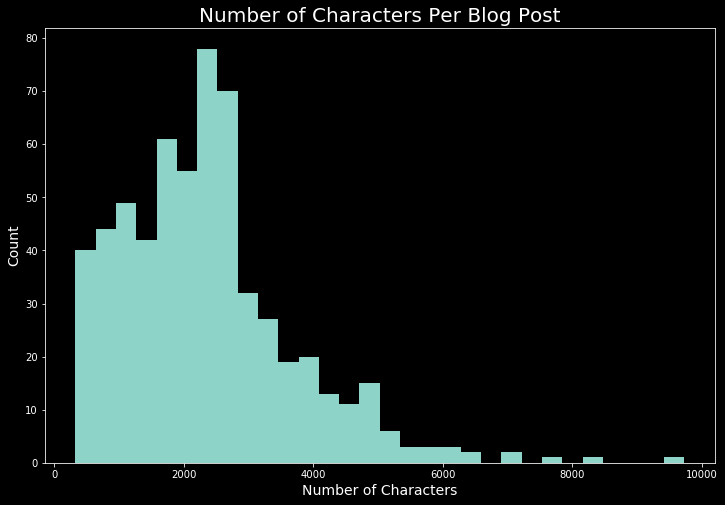

In [26]:
get_date_range(current_col, 'date')
print('')
content_lengths = get_content_character_range(current_col, 'content', return_content_lengths=True)

plt.figure(figsize=(12,8))
plt.hist(content_lengths, bins=30);
plt.title('Number of Characters Per Blog Post', fontsize=20);
plt.xlabel('Number of Characters', fontsize=14);
plt.ylabel('Count', fontsize=14);

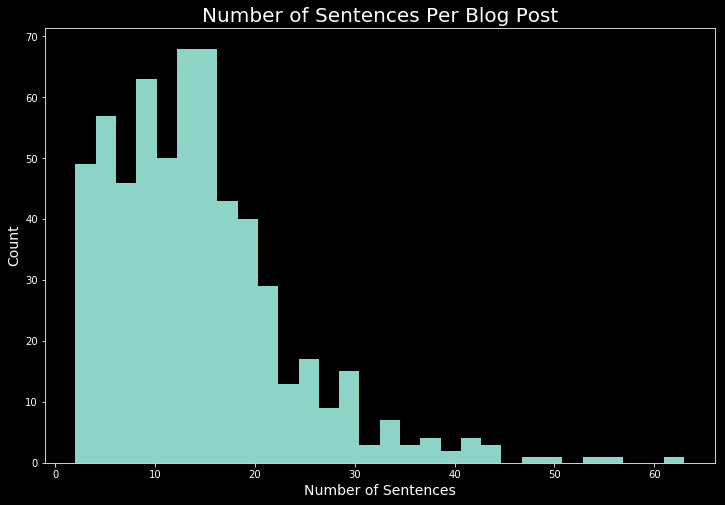

In [27]:
num_sentences = get_content_sentence_range(current_col, 'content', 
                                           return_num_sentences=True,
                                           return_sentences=False)

plt.figure(figsize=(12,8))
plt.hist(num_sentences, bins=30);
plt.title('Number of Sentences Per Blog Post', fontsize=20);
plt.xlabel('Number of Sentences', fontsize=14);
plt.ylabel('Count', fontsize=14);

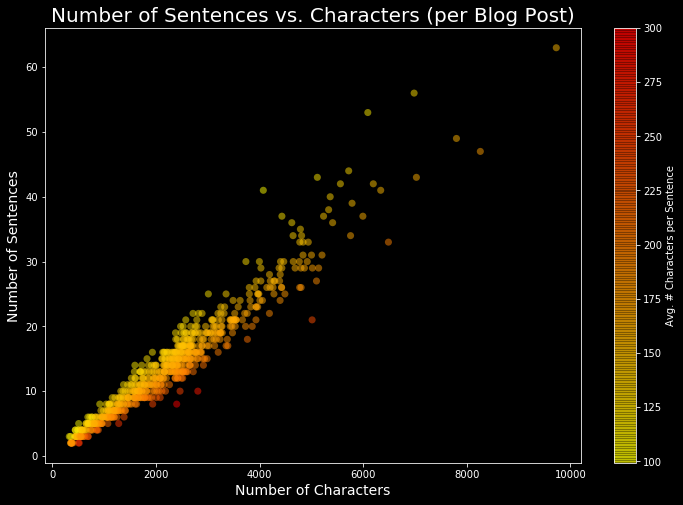

In [28]:
plt.figure(figsize=(12,8));
plt.scatter(content_lengths, num_sentences, 
            c=np.array(content_lengths)/np.array(num_sentences),
            cmap='autumn_r',
            alpha=0.5,
            s=50,
            edgecolors='None');
cbar = plt.colorbar()
cbar.set_label('Avg. # Characters per Sentence', rotation=90)
plt.title('Number of Sentences vs. Characters (per Blog Post)', fontsize=20);
plt.xlabel('Number of Characters', fontsize=14);
plt.ylabel('Number of Sentences', fontsize=14);

In [29]:
content = get_content_character_range(collection=current_col,
                                               content_keyname='content',
                                               return_content=True,
                                               return_content_lengths=False,
                                               verbose=False)

In [30]:
# Sentence Tokenization
from nltk.tokenize import sent_tokenize
documents = [sent_tokenize(text) for text in content]
print(documents[0])

['(Reuters) - Xerox Corp shareholders Carl Icahn and Darwin Deason said on Tuesday the U.S. company should seek to sell itself to one of its rivals or a private equity firm.', "Xerox could combine with a competitor that is actually willing to pay a significant premium, or Japan's Fujifilm Holdings themselves would step up and offer a full buy-out on fair terms, the shareholders wrote in an open letter.", '( ) The activist shareholders, who own a combined 15 percent of the U.S. printer and copier maker, have repeatedly urged shareholders to oppose the Fuji-Xerox deal.', 'Icahn and Deason said last week the agreement dramatically undervalued Xerox, and criticized the deal structure calling it “tortured, convoluted”.', '“Carl Icahn and Darwin Deason’s letter is consistent with their misguided campaign to undermine Xerox’s combination with Fuji Xerox,” Xerox said in a statement on Tuesday.', 'The company reiterated that among the range of strategic options, combination with Fuji Xerox is t

In [13]:
type(['']) == str

False

In [31]:
# Word tokenization
from nltk.tokenize import word_tokenize
for i in range(len(documents)):
    clear_output(wait=True)
    print("%d/%d" % (int(i+1), len(documents)))
    for j in range(len(documents[i])):
        documents[i][j] = word_tokenize(documents[i][j])        

598/598


In [32]:
print(documents[0][0])

['(', 'Reuters', ')', '-', 'Xerox', 'Corp', 'shareholders', 'Carl', 'Icahn', 'and', 'Darwin', 'Deason', 'said', 'on', 'Tuesday', 'the', 'U.S.', 'company', 'should', 'seek', 'to', 'sell', 'itself', 'to', 'one', 'of', 'its', 'rivals', 'or', 'a', 'private', 'equity', 'firm', '.']


In [33]:
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
for i in range(len(documents)):
    clear_output(wait=True)
    print("%d/%d" % (int(i+1), len(documents)))
    for j in range(len(documents[i])):
        documents[i][j] = pos_tag(documents[i][j])

598/598


In [34]:
documents[0][0]

[('(', '('),
 ('Reuters', 'NNPS'),
 (')', ')'),
 ('-', ':'),
 ('Xerox', 'NNP'),
 ('Corp', 'NNP'),
 ('shareholders', 'NNS'),
 ('Carl', 'NNP'),
 ('Icahn', 'NNP'),
 ('and', 'CC'),
 ('Darwin', 'NNP'),
 ('Deason', 'NNP'),
 ('said', 'VBD'),
 ('on', 'IN'),
 ('Tuesday', 'NNP'),
 ('the', 'DT'),
 ('U.S.', 'NNP'),
 ('company', 'NN'),
 ('should', 'MD'),
 ('seek', 'VB'),
 ('to', 'TO'),
 ('sell', 'VB'),
 ('itself', 'PRP'),
 ('to', 'TO'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('its', 'PRP$'),
 ('rivals', 'NNS'),
 ('or', 'CC'),
 ('a', 'DT'),
 ('private', 'JJ'),
 ('equity', 'NN'),
 ('firm', 'NN'),
 ('.', '.')]

In [35]:
# Extract phrases
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.chunk import ne_chunk
for i in range(len(documents)):
    clear_output(wait=True)
    print("%d/%d" % (int(i+1), len(documents)))
    for j in range(len(documents[i])):
        documents[i][j] = ne_chunk(documents[i][j])

598/598


In [36]:
print(documents[0][0])

(S
  (/(
  (ORGANIZATION Reuters/NNPS)
  )/)
  -/:
  (PERSON Xerox/NNP Corp/NNP)
  shareholders/NNS
  (PERSON Carl/NNP Icahn/NNP)
  and/CC
  (PERSON Darwin/NNP Deason/NNP)
  said/VBD
  on/IN
  Tuesday/NNP
  the/DT
  (GPE U.S./NNP)
  company/NN
  should/MD
  seek/VB
  to/TO
  sell/VB
  itself/PRP
  to/TO
  one/CD
  of/IN
  its/PRP$
  rivals/NNS
  or/CC
  a/DT
  private/JJ
  equity/NN
  firm/NN
  ./.)


In [45]:
# Textblob
from textblob import TextBlob
doc_idx = 3
for i in range(len(documents[doc_idx])):
    cur_sentence = ' '.join([w for w, t in documents[doc_idx][i].leaves()])
    print(cur_sentence.split())
    print(TextBlob(cur_sentence).sentiment)
    print('---')

['NEW YORK ( Reuters ) - Bitcoin hit a three-week high on Tuesday and has surged nearly 100 percent from its lowest level this year , as its recovery continued after South Korea ’ s financial regulator eased its stance on cryptocurrencies , weeks after it considered shutting down digital currency exchanges .']
Sentiment(polarity=0.04013468013468013, subjectivity=0.2805723905723906)
---
['Analysts cited South Korean news agency Yonhap , which reported Choe Heung-sik , governor of the Financial Supervisory Service , as saying that the government will support cryptocurrency trading if “ normal transactions ” are made .']
Sentiment(polarity=0.075, subjectivity=0.32499999999999996)
---
['Reuters is unable to verify the Yonhap report .']
Sentiment(polarity=-0.5, subjectivity=0.5)
---
['“ While the threat of heavy regulation , or even a total ban on exchange trading , has hovered over bitcoin in recent weeks , reports this morning that the South Korean government are softening their stance ha

'This feature will appear on job listings and will show an estimated or expected salary range for the role , based on data from our 546+ million members and employer provided information .'